# k-nearest neighbors algorithm (k-NN)

In [1]:
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# 為了顯示的漂亮, 我刻意的把印出來的 row 只顯示 15 個和 column 只顯示十個
# 大家練習的時候可以去掉下面兩行
pd.set_option('display.max_rows', 15)
pd.set_option('display.max_columns', 10)
# 使用 scikit-learn 提供的鳶尾花資料庫
iris = load_iris()
df = pd.DataFrame(iris['data'], columns = iris['feature_names'])
df["target"] = iris["target"]
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
...,...,...,...,...,...
143,6.8,3.2,5.9,2.3,2
144,6.7,3.3,5.7,2.5,2


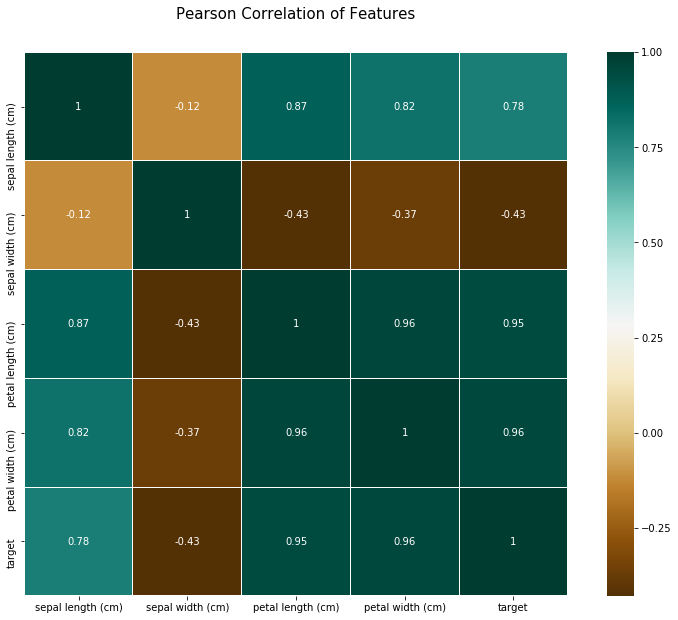

In [2]:
plt.figure(figsize=(14,10))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(df.astype(float).corr(), cmap = "BrBG",
            linewidths=0.1, square=True, linecolor='white',
            annot=True)

In [3]:
# 我們把我們擁有的資料集分成兩份, 一份測試, 一份訓練
from sklearn.model_selection import train_test_split
# 把資料分成兩部分 (1. 訓練資料 2. 測試資料)
data_train, data_test, target_train, target_test = train_test_split(iris['data'],
                                                                    iris['target'],
                                                                    test_size=0.1)

In [4]:
from sklearn.neighbors import KNeighborsClassifier
# 我喜歡先從 8 個鄰居開始試試看
clf = KNeighborsClassifier(n_neighbors=8)
clf = clf.fit(data_train, target_train)

In [6]:
from sklearn.metrics import accuracy_score
predict = clf.predict(data_test)
print("預測　　:", predict)
print("正確標籤:", target_test)
print("正確率　: ", accuracy_score(target_test, predict) * 100, "%")

預測　　: [2 1 2 2 0 0 1 2 0 2 1 1 2 0 0]
正確標籤: [2 1 2 2 0 0 1 2 0 1 1 2 2 0 0]
正確率　:  86.66666666666667 %


In [7]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(target_test, predict)
pd.DataFrame(cm)

,0,1,2
0,5,0,0
1,0,3,1
2,0,1,5
